In [7]:
pip install quandl

Note: you may need to restart the kernel to use updated packages.


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [9]:
data=pd.read_csv("tataglobal.csv")

In [10]:
data

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,10/8/2018,208.00,222.25,206.85,216.00,215.15,4642146,10062.83
1,10/5/2018,217.00,218.60,205.90,210.25,209.20,3519515,7407.06
2,10/4/2018,223.50,227.80,216.15,217.25,218.20,1728786,3815.79
3,10/3/2018,230.00,237.50,225.75,226.45,227.60,1708590,3960.27
4,10/1/2018,234.55,234.60,221.05,230.30,230.90,1534749,3486.05
...,...,...,...,...,...,...,...,...
1230,10/14/2013,160.85,161.45,157.70,159.30,159.45,1281419,2039.09
1231,10/11/2013,161.15,163.45,159.00,159.80,160.05,1880046,3030.76
1232,10/10/2013,156.00,160.80,155.85,160.30,160.15,3124853,4978.80
1233,10/9/2013,155.70,158.20,154.15,155.30,155.55,2049580,3204.49


In [11]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03,1235.000000
mean,168.954858,171.429069,166.402308,168.736356,168.731053,2.604151e+06,4843.166502
std,51.499145,52.436761,50.542919,51.587384,51.544928,2.277028e+06,5348.919832
min,103.000000,104.600000,100.000000,102.600000,102.650000,1.001800e+05,128.040000
25%,137.550000,138.925000,135.250000,137.175000,137.225000,1.284482e+06,1801.035000
50%,151.500000,153.250000,149.500000,151.200000,151.100000,1.964885e+06,3068.510000
75%,169.000000,172.325000,166.700000,169.100000,169.500000,3.095788e+06,5852.600000
max,327.700000,328.750000,321.650000,325.950000,325.750000,2.919102e+07,55755.080000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1235 non-null   object 
 1   Open                  1235 non-null   float64
 2   High                  1235 non-null   float64
 3   Low                   1235 non-null   float64
 4   Last                  1235 non-null   float64
 5   Close                 1235 non-null   float64
 6   Total Trade Quantity  1235 non-null   int64  
 7   Turnover (Lacs)       1235 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 77.3+ KB


In [13]:
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [14]:
data.head(5)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,10/8/2018,208.00,222.25,206.85,216.00,215.15,4642146,10062.83
1,10/5/2018,217.00,218.60,205.90,210.25,209.20,3519515,7407.06
2,10/4/2018,223.50,227.80,216.15,217.25,218.20,1728786,3815.79
3,10/3/2018,230.00,237.50,225.75,226.45,227.60,1708590,3960.27
4,10/1/2018,234.55,234.60,221.05,230.30,230.90,1534749,3486.05


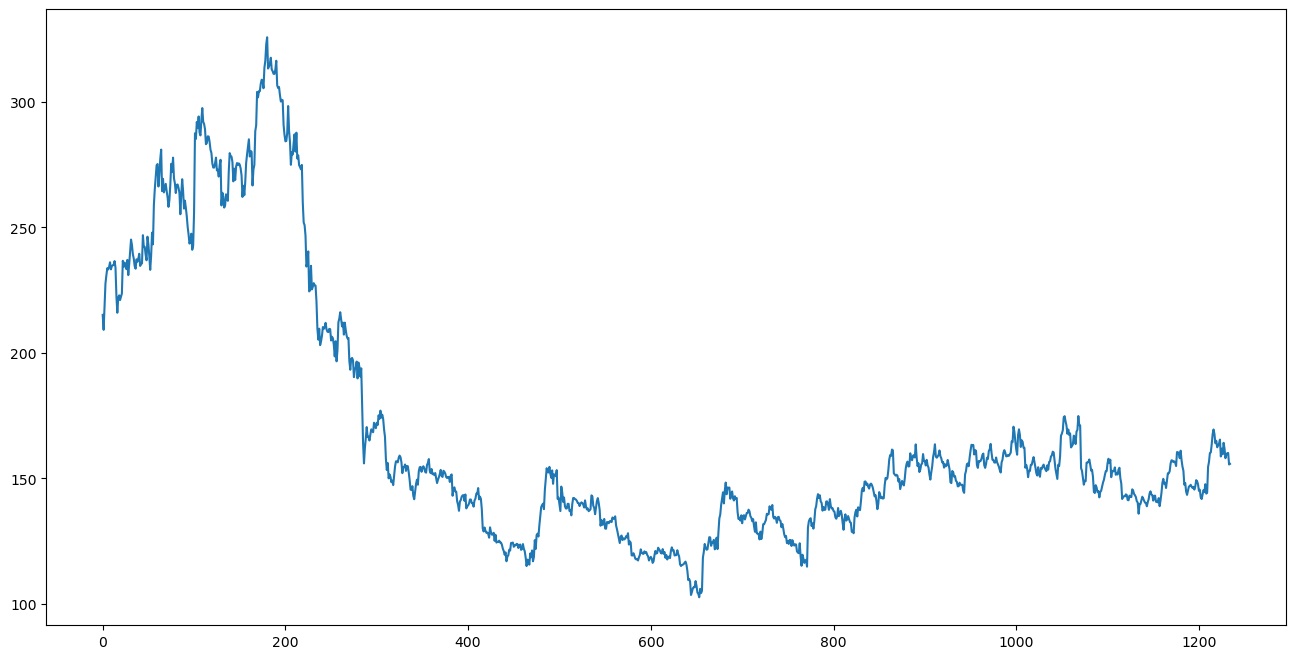

In [15]:
plt.figure(figsize=(16,8))
plt.plot(data['Close'],label='closing price')

In [16]:
data['Open-Close']=data['Open']-data['Close']
data['High-Low']=data['High']-data['Low']
data=data.dropna()

#input features wheteher customer should buy or shell the stock

In [17]:
data['Open-Close'] = data['Open'] - data['Close']
data['High-Low'] = data['High'] - data['Low']
data = data.dropna()
x = data[['Open-Close', 'High-Low']]
x.head()


,Open-Close,High-Low
0,-7.15,15.40
1,7.80,12.70
2,5.30,11.65
3,2.40,11.75
4,3.65,13.55


In [18]:
data['Open-Close']=data['Open']-data['Close']
data['High-Low']=data['High']-data['Low']
data=data.dropna()

#input features wheteher customer should buy or shell the stock

In [19]:
data['Open-Close'] = data['Open'] - data['Close']
data['High-Low'] = data['High'] - data['Low']
data = data.dropna()
x = data[['Open-Close', 'High-Low']]
x.head()


,Open-Close,High-Low
0,-7.15,15.40
1,7.80,12.70
2,5.30,11.65
3,2.40,11.75
4,3.65,13.55


# our intenstion is +1 is for buy and -1 is for sell . So, for doing this then we can implify the target veriable is Y

In [21]:
y=np.where(data['Close'].shift(-1)>data['Close'],1,-1)


In [22]:
y

array([-1,  1,  1, ..., -1,  1, -1])

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=44)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


# using gridsearch to find the best parameter
params = {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}
knn =neighbors.KNeighborsClassifier()
model = GridSearchCV(knn, params, cv=5)

# fit the model
model.fit(x_train, y_train)

# accuracy_score
accuracy_train = accuracy_score(y_train, model.predict(x_train))
accuracy_test = accuracy_score(y_test, model.predict(x_test))

print('Train_data Accuracy: %.2f' %accuracy_train)
print('Test_data Accuracy: %.2f' %accuracy_test)


C:\Users\shaw3\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\shaw3\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Train_data Accuracy: 0.88
Test_data Accuracy: 0.86


C:\Users\shaw3\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\shaw3\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [26]:
predictions_classifcation = model.predict(x_test)


C:\Users\shaw3\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [27]:
import pandas as pd

# Assuming y_test and predictions_classifcation are arrays/lists of the same length
actual_predicted_data = pd.DataFrame({'Actual Class': y_test, 'Predicted Class': predictions_classifcation})

# Print the first few rows of the DataFrame to verify
print(actual_predicted_data.head())


   Actual Class  Predicted Class
0            -1               -1
1            -1               -1
2            -1               -1
3             1                1
4             1                1


In [28]:
actual_predicted_data= pd.DataFrame({'Actual Class':y_test,'Predicted Class':predictions_classifcation})

In [29]:
actual_predicted_data.head(10)

,Actual Class,Predicted Class
0,-1,-1
1,-1,-1
2,-1,-1
3,1,1
4,1,1
5,-1,-1
6,1,1
7,-1,-1
8,1,1
9,-1,1


In [30]:
y=data['Close']

In [31]:
y

0       215.15
1       209.20
2       218.20
3       227.60
4       230.90
         ...  
1230    159.45
1231    160.05
1232    160.15
1233    155.55
1234    155.80
Name: Close, Length: 1235, dtype: float64

In [44]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Assuming x_train_reg, x_test_reg, y_train_reg, y_test_reg are defined earlier

x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x, y, test_size=0.25, random_state=44)

# using gridsearch to find the best parameter
params = {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}
knn_reg = KNeighborsRegressor()
model_reg = GridSearchCV(knn_reg, params, cv=5)

# fit the model
model_reg.fit(x_train_reg, y_train_reg)
predictions = model_reg.predict(x_test_reg)


In [45]:
print(predictions)

[194.13333333 195.22666667 241.17333333 160.50333333 132.12666667
 225.41333333 198.15333333 174.71333333 130.63       137.87333333
 190.37333333 136.34666667 153.69       137.92333333 238.05666667
 149.19333333 168.46333333 143.99333333 180.39       142.59333333
 169.21666667 167.02333333 184.94666667 149.61666667 150.27
 138.69       157.04       141.01666667 212.63666667 240.75
 139.23       151.44       155.12       155.51333333 142.98333333
 245.51333333 171.78       143.48666667 133.82333333 143.84
 146.15333333 138.24333333 148.75666667 189.26666667 141.07666667
 152.07666667 140.00333333 131.75       176.82666667 226.25666667
 153.87666667 214.65       136.79333333 187.22       141.21666667
 142.47       133.54333333 141.02333333 163.46666667 223.89
 156.58       144.06333333 139.39       140.21333333 185.09666667
 207.2        153.53666667 194.35       137.12333333 147.11
 168.96666667 142.79666667 171.51666667 155.54333333 153.09
 152.66       192.56333333 190.78666667 170.45

In [54]:
rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(predictions)),2)))
rms

169.4572072961273

In [55]:
valid=pd.DataFrame({'Actual Close':y_test_reg,'Predicted Close value':predictions})

In [56]:
valid.head(10)

,Actual Close,Predicted Close value
1000,161.60,194.133333
715,132.50,195.226667
283,193.85,241.173333
410,143.90,160.503333
1188,145.15,132.126667
141,278.20,225.413333
230,226.35,198.153333
794,139.50,174.713333
481,139.40,130.630000
707,137.55,137.873333
